In [2]:
import matplotlib.pyplot as plt
from bitarray import bitarray
from PIL import ImageOps
from PIL import Image
import numpy as np

In [3]:
# Open the image file
test_image_RGB = Image.open("TestImage_RGB.png")
print(np.array(test_image_RGB))

[[[ 49 124 189]
  [ 49 124 189]
  [ 49 124 189]
  ...
  [126 164 209]
  [135 173 218]
  [135 173 218]]

 [[ 49 124 189]
  [ 49 124 189]
  [ 49 124 189]
  ...
  [131 170 213]
  [134 172 217]
  [134 173 216]]

 [[ 48 122 187]
  [ 48 122 187]
  [ 48 122 187]
  ...
  [128 165 207]
  [131 168 212]
  [131 168 210]]

 ...

 [[ 24  84  48]
  [  9  69  33]
  [ 10  72  35]
  ...
  [216 155   4]
  [220 159   8]
  [220 159   8]]

 [[ 30  89  59]
  [ 11  72  41]
  [  8  69  38]
  ...
  [219 158   7]
  [234 170  21]
  [234 170  21]]

 [[ 37  95  70]
  [ 15  75  49]
  [  8  68  42]
  ...
  [221 161  13]
  [234 172  27]
  [234 172  29]]]


In [4]:
# Convert the image in gray scale
test_image_G = test_image_RGB.convert('L')
# Resize the image in 8x8 pixels
test_image_G = test_image_G.resize((256,256))
# Save the image
test_image_G.save("TestImage_G.png")

#print(np.array(test_image_G))

contador_aux = 0
for i in np.array(test_image_G):
    for j in i:
        print(str(contador_aux) + ": " + str(j))
        contador_aux += 1

0: 109
1: 109
2: 109
3: 109
4: 108
5: 109
6: 110
7: 110
8: 111
9: 110
10: 113
11: 117
12: 121
13: 137
14: 137
15: 136
16: 135
17: 136
18: 137
19: 137
20: 137
21: 137
22: 138
23: 140
24: 137
25: 134
26: 138
27: 144
28: 149
29: 150
30: 147
31: 142
32: 138
33: 138
34: 143
35: 150
36: 150
37: 151
38: 152
39: 152
40: 150
41: 146
42: 143
43: 141
44: 145
45: 145
46: 139
47: 131
48: 126
49: 128
50: 129
51: 131
52: 134
53: 132
54: 130
55: 129
56: 123
57: 117
58: 104
59: 99
60: 102
61: 103
62: 103
63: 103
64: 103
65: 103
66: 103
67: 103
68: 103
69: 103
70: 103
71: 103
72: 103
73: 103
74: 103
75: 103
76: 103
77: 103
78: 103
79: 103
80: 103
81: 103
82: 103
83: 103
84: 103
85: 103
86: 103
87: 103
88: 103
89: 103
90: 103
91: 103
92: 103
93: 103
94: 103
95: 103
96: 103
97: 103
98: 103
99: 103
100: 103
101: 103
102: 103
103: 103
104: 103
105: 103
106: 103
107: 103
108: 103
109: 103
110: 103
111: 103
112: 103
113: 103
114: 103
115: 103
116: 103
117: 103
118: 103
119: 103
120: 103
121: 103
122: 103
123:

In [39]:
def tomif(Image, FromWidth, ToWidth, Depth):
    # Convert the image data to a numpy array
    image_array = np.array(Image)

    # Convert the pixel values to integers
    integer_image = image_array.astype(np.uint8)

    # Flatten the image into a 1D array
    flattened_image = integer_image.flatten()

    # Create a bitarray for the binary representation of the image data
    binary_data = bitarray()
    for pixel in flattened_image:
        binary_data.frombytes(bytes([pixel]))

    # Create the .mif file
    with open('image.mif', 'w') as f:
        f.write('DEPTH = {};\n'.format(Depth))
        f.write('WIDTH = {};\n'.format(ToWidth))
        f.write('ADDRESS_RADIX = DEC;\n')
        f.write('DATA_RADIX = BIN;\n')
        f.write('CONTENT\n')
        f.write('BEGIN\n')

        address = 0
        for i in range(0, Depth):
            data = binary_data[i:i+FromWidth]
            f.write('{}: {};\n'.format(address, data.to01()))
            address += 1

        f.write('END;\n')

In [40]:
tomif(test_image_G, 8, 16, 65536)

In [6]:
def histogram_equalization(image):
    # Calculate histogram
    histogram = [0] * 256
    for row in image:
        for pixel in row:
            histogram[pixel] += 1

    # Calculate cumulative distribution function (CDF)
    cdf = [0] * 256
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]
        
    print(cdf)

    # Calculate equalized histogram
    equalized_histogram = [0] * 256
    for i in range(256):
        equalized_histogram[i] = round((cdf[i] - cdf[0]) / ((image.shape[0] * image.shape[1]) - cdf[0]) * 255)
    
    print("hola hola hola")
    
    print(equalized_histogram)
        


    # Apply equalization to image
    equalized_image = []
    for row in image:
        equalized_row = []
        for pixel in row:
            equalized_pixel = equalized_histogram[pixel]
            equalized_row.append(equalized_pixel)
        equalized_image.append(equalized_row)

    return equalized_image

In [7]:
def visualize_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [8]:
newImage_G = histogram_equalization(np.array(test_image_G))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 5, 7, 18, 32, 41, 60, 81, 102, 132, 170, 199, 242, 301, 376, 475, 599, 704, 816, 926, 1057, 1174, 1328, 1471, 1625, 1814, 2037, 2233, 2490, 2696, 2888, 3095, 3292, 3487, 3657, 3845, 4025, 4206, 4382, 4525, 4686, 4841, 4983, 5142, 5292, 5427, 5566, 5722, 5844, 5974, 6100, 6239, 6401, 6531, 6647, 6792, 6930, 7067, 7182, 7306, 7451, 7606, 7743, 7880, 8019, 8168, 8291, 8434, 8559, 8684, 8833, 9004, 9179, 9361, 9543, 9734, 9993, 11169, 11885, 13436, 13966, 14454, 14985, 15695, 15894, 16529, 17150, 17806, 18272, 18525, 19277, 20009, 20794, 21030, 21692, 22604, 23277, 23722, 24363, 24784, 25392, 25672, 26278, 26706, 27327, 28162, 28713, 29356, 29913, 30167, 30743, 31353, 31941, 32390, 32628, 33242, 33877, 34560, 34841, 35465, 36199, 36812, 37334, 37981, 38441, 39083, 39472, 39982, 40493, 41014, 41516, 42052, 42528, 42981, 43381, 43844, 44260, 44723, 45120, 45475, 45890, 46256, 46653, 47152, 47634, 48119, 48548, 48972, 49362

In [9]:
print(newImage_G)

[[69, 69, 69, 69, 67, 69, 71, 71, 72, 71, 78, 88, 96, 129, 129, 127, 126, 127, 129, 129, 129, 129, 132, 136, 129, 124, 132, 145, 156, 158, 152, 141, 132, 132, 143, 158, 158, 160, 162, 162, 158, 150, 143, 138, 148, 148, 134, 117, 106, 112, 114, 117, 124, 120, 116, 114, 100, 88, 58, 43, 54, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 54, 52, 52, 52, 39, 61, 114, 141, 143, 158, 145, 167, 165, 164, 152, 141, 143, 148, 145, 145, 145, 145, 154, 158, 158, 150, 154, 162, 167, 169, 169, 171, 171, 171, 171, 171, 171, 171, 171, 174, 174, 174, 176, 176, 176, 174, 172, 174, 176, 165, 167, 162, 158, 165, 172, 207, 223, 222, 222, 223, 223, 221, 221, 222, 222, 224, 230, 236, 234, 234, 236, 236, 234, 233, 234, 233, 234, 233, 229, 229, 231, 232, 233, 229, 222, 224, 224, 222, 236, 241, 238, 241, 

In [9]:
print(len(newImage_G))
print(len(newImage_G[0]))

256
256


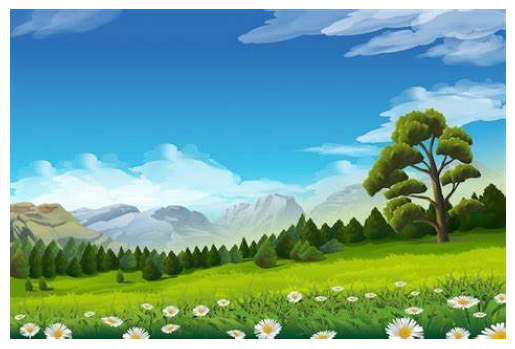

In [9]:
visualize_image(test_image_RGB)

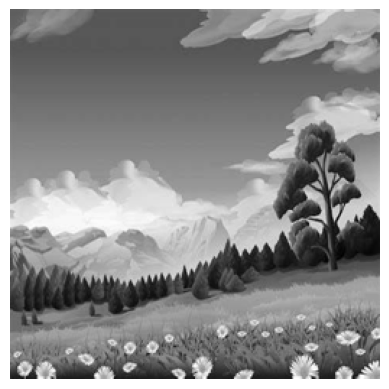

In [7]:
visualize_image(test_image_G)

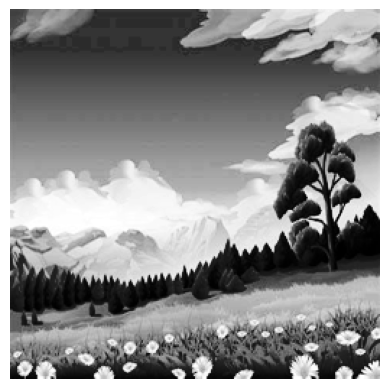

In [8]:
visualize_image(newImage_G)